In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 43
#rounding up to two decimal points
pd.options.display.float_format = '{:.2f}'.format
#jetfire

In [2]:
data = pd.read_excel('datasets/Final_Project_Dataset.xlsx', sheet_name = 'Data')
series = pd.read_excel('datasets/Final_Project_Dataset.xlsx', sheet_name = 'Series - Metadata')
country = pd.read_excel('datasets/Final_Project_Dataset.xlsx', sheet_name = 'Country - Metadata')


### filtering jetfire data only

In [3]:
data.head()

,Country Code Total,Country Name,Hult Region,Cool Name,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)",...,"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
0,ABW,Aruba,Carribean Islands & Parts of Latin America,Ratchet,nan,99.10,32.79,nan,nan,26.23,nan,nan,nan,nan,nan,nan,nan,1.76,nan,nan,nan,...,11.00,nan,52.00,74.72,nan,nan,119.19,nan,nan,101353,nan,nan,nan,nan,95.13,nan,nan,99.06,nan,141.19,0.89
1,AFG,Afghanistan,Middle East & Russia,Mirage,nan,nan,111.14,nan,24.00,0.15,64.24,23.49,28.86,12.92,79.79,47.43,nan,6.25,5276.73,nan,360.00,...,189.00,nan,1.84,60.24,nan,676.00,28.94,70.60,178.60,27294031,nan,36.00,nan,24.60,nan,27.70,81574.00,nan,72.32,73.07,40.00
2,AGO,Angola,Sub-Saharan Africa,Sideswipe,9200.00,74.89,178.18,6.00,nan,1.18,15.12,11.88,13.48,63.49,69.60,66.45,82.05,6.31,17090.73,12.19,2760.00,...,382.00,5.40,1.90,56.19,nan,606.00,31.13,86.40,16.96,21759420,12.70,nan,1.60,23.70,39.27,37.30,1377992.00,74.89,71.97,127.54,69.00
3,ALB,Albania,Eastern Europe,Skids & Mudflap,100.00,87.15,18.91,14.00,nan,1.48,48.59,14.10,28.78,40.38,55.51,47.87,77.65,1.65,24757.50,12.88,3950.00,...,16.00,8.90,23.86,75.94,95.94,30.00,62.16,12.30,123.79,2947314,2.30,nan,0.10,9.70,92.83,7.10,nan,87.15,59.30,77.45,0.70
4,AND,Andorra,Eastern Europe,Skids & Mudflap,nan,nan,nan,nan,nan,6.43,nan,nan,nan,nan,nan,nan,nan,1.25,nan,nan,nan,...,5.50,nan,70.04,nan,nan,nan,76.56,3.90,nan,83861,nan,nan,nan,nan,nan,25.00,nan,nan,nan,nan,nan


In [4]:
pj = data.loc[data['Cool Name'] == 'Jetfire']

In [5]:
pj.head()

,Country Code Total,Country Name,Hult Region,Cool Name,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)",...,"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
11,AUT,Austria,Western Europe,Jetfire,100.00,nan,10.59,62.00,98.60,8.30,2.67,2.03,2.32,50.35,64.54,57.19,90.73,1.42,91063.38,11.02,49110.00,...,10.00,8.00,72.87,80.43,nan,4.00,129.71,3.80,nan,8321496,nan,nan,0.10,2.50,nan,27.30,nan,nan,13.58,102.07,0.59
14,BEL,Belgium,Western Europe,Jetfire,nan,97.84,9.23,nan,nan,9.75,2.19,0.44,1.22,43.18,56.90,49.86,131.06,1.85,99976.92,7.63,46720.00,...,10.00,8.70,66.00,79.68,nan,8.00,105.22,3.80,nan,10709973,nan,nan,nan,2.50,nan,35.30,nan,97.56,14.26,158.91,0.73
33,CHE,Switzerland,Western Europe,Jetfire,nan,98.53,4.30,nan,nan,5.28,2.57,1.47,1.97,59.00,73.26,65.94,61.66,1.48,101217.24,16.22,62940.00,...,7.00,7.50,79.20,81.99,nan,6.00,116.36,4.00,nan,7647675,nan,nan,nan,2.50,94.09,28.50,nan,93.62,15.90,114.78,0.45
49,DEU,Germany,Western Europe,Jetfire,600.00,99.74,9.43,61.00,98.50,9.51,1.52,0.42,0.91,48.15,61.76,54.76,98.48,1.38,87914.57,10.15,43870.00,...,5.90,nan,78.00,79.74,nan,7.00,130.07,3.60,nan,82110097,nan,100.00,0.10,2.50,101.90,32.20,nan,97.68,11.69,80.94,0.46
52,DNK,Denmark,Western Europe,Jetfire,100.00,96.51,5.58,55.00,nan,8.54,0.53,0.31,0.42,58.78,68.95,63.79,76.34,1.89,87996.82,13.10,60390.00,...,6.90,9.80,85.02,78.45,nan,8.00,119.27,3.60,nan,5493621,nan,nan,0.20,2.50,100.97,38.00,nan,95.96,8.87,104.83,0.31


In [6]:
country_list = list(pj.loc[:,'Country Code Total'])

### Checking other sheets

In [7]:
series.head()
# this sheet is about the definition of indicators and won't be necessary

,Code,License Type,Indicator Name,Short definition,Long definition,Source,Topic,Dataset,Unit of measure,Periodicity,Base Period,Aggregation method,Statistical concept and methodology,Development relevance,Limitations and exceptions,General comments,Notes from original source,License URL
0,NY.AGR.SUBS.GD.ZS,CC BY-4.0,Agricultural support estimate (% of GDP),NaN,Agriculture support is the annual monetary val...,Organisation for Economic Co-operation and Dev...,Economic Policy & Debt: National accounts: Sha...,NaN,NaN,Annual,nan,NaN,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
1,SP.ADO.TFRT,CC BY-4.0,"Adolescent fertility rate (births per 1,000 wo...",NaN,Adolescent fertility rate is the number of bir...,"United Nations Population Division, World Popu...",Health: Reproductive health,NaN,NaN,Annual,nan,Weighted average,Reproductive health is a state of physical and...,NaN,NaN,This is the Sustainable Development Goal indic...,NaN,https://datacatalog.worldbank.org/public-licen...
2,ER.H2O.FWTL.ZS,CC BY-4.0,"Annual freshwater withdrawals, total (% of int...",NaN,Annual freshwater withdrawals refer to total w...,"Food and Agriculture Organization, AQUASTAT data.",Environment: Freshwater,NaN,NaN,Annual,nan,Weighted average,Annual freshwater withdrawals are total water ...,While some countries have an abundant supply o...,A common perception is that most of the availa...,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
3,TM.TAX.AGRI.CD.DV,CC BY-4.0,Average tariffs imposed by developed countries...,NaN,It is the average tariffs imposed by developed...,United Nations Conference on Trade and Develop...,Private Sector & Trade: Tariffs,NaN,NaN,Annual,nan,NaN,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
4,TM.TAX.AGRI.CD.LD,CC BY-4.0,Average tariffs imposed by developed countries...,NaN,It is the average tariffs imposed by developed...,United Nations Conference on Trade and Develop...,Private Sector & Trade: Tariffs,NaN,NaN,Annual,nan,NaN,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...


In [8]:
# country information
country.head()

,Code,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,National accounts base year,National accounts reference year,System of National Accounts,SNA price valuation,Alternative conversion factor,PPP survey years,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,2-alpha code,WB-2 code,Table Name,Short Name
0,AFG,Islamic State of Afghanistan,Low income,South Asia,IDA,HIPC,Afghan afghani,1979,"Demographic and Health Survey, 2015",NaN,2002/03,NaN,Country uses the 1993 System of National Accou...,Value added at basic prices (VAB),NaN,PPPs are imputed for 2011 and 2017 based on a ...,BPM6,Actual,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,"Integrated household survey (IHS), 2016/17",NaN,NaN,nan,2017.00,AF,AF,Afghanistan,Afghanistan
1,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,IBRD,NaN,Albanian lek,2011,"Demographic and Health Survey, 2017/18",NaN,Original chained constant price data are resca...,2010,Country uses the 2008 System of National Accou...,Value added at basic prices (VAB),NaN,Rolling surveys (annual estimation),BPM6,Actual,Special trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.00,2017.00,AL,AL,Albania,Albania
2,DZA,People's Democratic Republic of Algeria,Lower middle income,Middle East & North Africa,IBRD,NaN,Algerian dinar,2008,"Multiple Indicator Cluster Survey, 2018/2019",NaN,Original chained constant price data are resca...,1999,Country uses the 1993 System of National Accou...,Value added at basic prices (VAB),NaN,"2017, 2011",BPM6,Actual,Special trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,"Integrated household survey (IHS), 2011",NaN,NaN,2010.00,2017.00,DZ,DZ,Algeria,Algeria
3,ASM,American Samoa,Upper middle income,East Asia & Pacific,NaN,NaN,U.S. dollar,2010,NaN,NaN,2009,NaN,Country uses the 2008 System of National Accou...,Value added at basic prices (VAB),NaN,2011 (Only for individual consumption expendit...,NaN,NaN,Special trade system,NaN,NaN,NaN,Yes,2008,nan,2017.00,AS,AS,American Samoa,American Samoa
4,AND,Principality of Andorra,High income,Europe & Central Asia,NaN,NaN,Euro,2011. Population data compiled from administra...,NaN,NaN,2010,NaN,Country uses the 1993 System of National Accou...,Value added at basic prices (VAB),NaN,NaN,NaN,NaN,General trade system,NaN,NaN,NaN,Yes,NaN,nan,nan,AD,AD,Andorra,Andorra


In [9]:
#selecting only necessary columns
country = country.loc[country.Code.isin(country_list)]
country.head()

,Code,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,National accounts base year,National accounts reference year,System of National Accounts,SNA price valuation,Alternative conversion factor,PPP survey years,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,2-alpha code,WB-2 code,Table Name,Short Name
12,AUT,Republic of Austria,High income,Europe & Central Asia,NaN,Euro area,Euro,2011. Population data compiled from administra...,NaN,A simple multiplier is used to convert the nat...,Original chained constant price data are resca...,2010,Country uses the 2008 System of National Accou...,Value added at basic prices (VAB),NaN,Rolling surveys (annual estimation),BPM6,NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard Plus (SDDS+),"Income survey (IS), 2015",Yes,2010,2014.00,2017.00,AT,AT,Austria,Austria
19,BEL,Kingdom of Belgium,High income,Europe & Central Asia,NaN,Euro area,Euro,2011. Population data compiled from administra...,NaN,A simple multiplier is used to convert the nat...,Original chained constant price data are resca...,2010,Country uses the 2008 System of National Accou...,Value added at basic prices (VAB),NaN,Rolling surveys (annual estimation),BPM6,NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),"Income survey (IS), 2015",Yes,2010,2014.00,2017.00,BE,BE,Belgium,Belgium
56,DNK,Kingdom of Denmark,High income,Europe & Central Asia,NaN,NaN,Danish krone,2011. Population data compiled from administra...,NaN,NaN,Original chained constant price data are resca...,2010,Country uses the 2008 System of National Accou...,Value added at basic prices (VAB),NaN,Rolling surveys (annual estimation),BPM6,NaN,General trade system,Consolidated central government,Special Data Dissemination Standard Plus (SDDS+),"Income survey (IS), 2015",Yes,2010,2014.00,2017.00,DK,DK,Denmark,Denmark
77,FRO,Faroe Islands,High income,Europe & Central Asia,NaN,NaN,Danish krone,2011,NaN,NaN,NaN,NaN,Country uses the 1993 System of National Accou...,Value added at basic prices (VAB),NaN,NaN,BPM5 (Converted into BPM6 by IMF),NaN,General trade system,NaN,NaN,NaN,Yes,NaN,nan,2017.00,FO,FO,Faroe Islands,Faroe Islands
81,FRA,French Republic,High income,Europe & Central Asia,NaN,Euro area,Euro,2016,NaN,The following irrevocable euro conversion rate...,Original chained constant price data are resca...,2010,Country uses the 2008 System of National Accou...,Value added at basic prices (VAB),NaN,Rolling surveys (annual estimation),BPM6,NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard Plus (SDDS+),"Income survey (IS), 2015",Yes,2010,2014.00,2017.00,FR,FR,France,France


In [10]:
country.describe(include = 'O')

,Code,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,National accounts base year,National accounts reference year,System of National Accounts,SNA price valuation,Alternative conversion factor,PPP survey years,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,2-alpha code,WB-2 code,Table Name,Short Name
count,22,22,22,22,0,10,22,21,0,9,19,16,17,19,0,15,16,0,19,14,14,13,22,14,22,22,22,22
unique,22,22,1,2,0,1,7,11,0,9,4,2,2,1,0,2,2,0,2,1,2,2,1,2,22,22,22,22
top,PRT,Isle of Man,High income,Europe & Central Asia,NaN,Euro area,Euro,2011. Population data compiled from administra...,NaN,A simple multiplier is used to convert the nat...,Original chained constant price data are resca...,2010,Country uses the 2008 System of National Accou...,Value added at basic prices (VAB),NaN,Rolling surveys (annual estimation),BPM6,NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard Plus (SDDS+),"Income survey (IS), 2015",Yes,2010,IM,IM,Isle of Man,Isle of Man
freq,1,1,22,20,NaN,10,12,4,NaN,1,16,15,16,19,NaN,14,15,NaN,14,14,8,12,22,12,1,1,1,1


#### Basic Information about the region

1. 22 countries are high income countries
2. 20 countries belong to the western Europe and the rest of the two countries belong to the caribean sea, geographically
3. 10 countries are in Euro zon but there are 12 countreis using Euro as their national currency

### Setting a DataFrame

#### Dropping unncessary columns and setting a country as an index

In [11]:
pj = pj.drop(columns = ['Country Code Total', 'Hult Region', 'Cool Name']).set_index('Country Name')

In [12]:
pj.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Austria,100.00,nan,10.59,62.00,98.60,8.30,2.67,2.03,2.32,50.35,64.54,57.19,90.73,1.42,91063.38,11.02,49110.00,83.00,100.00,100.00,10.00,8.00,72.87,80.43,nan,4.00,129.71,3.80,nan,8321496,nan,nan,0.10,2.50,nan,27.30,nan,nan,13.58,102.07,0.59
Belgium,nan,97.84,9.23,nan,nan,9.75,2.19,0.44,1.22,43.18,56.90,49.86,131.06,1.85,99976.92,7.63,46720.00,93.00,99.50,100.00,10.00,8.70,66.00,79.68,nan,8.00,105.22,3.80,nan,10709973,nan,nan,nan,2.50,nan,35.30,nan,97.56,14.26,158.91,0.73
Switzerland,nan,98.53,4.30,nan,nan,5.28,2.57,1.47,1.97,59.00,73.26,65.94,61.66,1.48,101217.24,16.22,62940.00,92.00,99.90,100.00,7.00,7.50,79.20,81.99,nan,6.00,116.36,4.00,nan,7647675,nan,nan,nan,2.50,94.09,28.50,nan,93.62,15.90,114.78,0.45
Germany,600.00,99.74,9.43,61.00,98.50,9.51,1.52,0.42,0.91,48.15,61.76,54.76,98.48,1.38,87914.57,10.15,43870.00,97.00,99.20,100.00,5.90,nan,78.00,79.74,nan,7.00,130.07,3.60,nan,82110097,nan,100.00,0.10,2.50,101.90,32.20,nan,97.68,11.69,80.94,0.46
Denmark,100.00,96.51,5.58,55.00,nan,8.54,0.53,0.31,0.42,58.78,68.95,63.79,76.34,1.89,87996.82,13.10,60390.00,87.00,99.60,100.00,6.90,9.80,85.02,78.45,nan,8.00,119.27,3.60,nan,5493621,nan,nan,0.20,2.50,100.97,38.00,nan,95.96,8.87,104.83,0.31


In [13]:
pj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Austria to Sint Maarten (Dutch part)
Data columns (total 41 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   AIDS estimated deaths (UNAIDS estimates)                                   9 non-null      float64
 1   Adjusted net enrollment rate, primary (% of primary school age children)   13 non-null     float64
 2   Adolescent fertility rate (births per 1,000 women ages 15-19)              14 non-null     float64
 3   Antiretroviral therapy coverage (% of people living with HIV)              10 non-null     float64
 4   Births attended by skilled health staff (% of total)                       6 non-null      float64
 5   CO2 emissions (metric tons per capita)                                     18 non-null     float64
 6   Contributing family workers, female 

### Checking Missing Values

In [14]:
pj.isna().sum(1).sort_values(ascending = False)

Country Name
Sint Maarten (Dutch part)    38
St. Martin (French part)     38
Isle of Man                  38
Gibraltar                    37
Faeroe Islands               34
Liechtenstein                30
Greenland                    30
Monaco                       30
United Kingdom               10
Belgium                      10
Switzerland                   9
Iceland                       8
Luxembourg                    8
Portugal                      8
Austria                       8
Netherlands                   7
Spain                         6
Denmark                       6
Ireland                       5
France                        5
Germany                       5
Italy                         4
dtype: int64

#### importing missing values from World Bank Open Data

In [15]:
new_data = pd.read_excel(io = 'datasets/country.xls', header = 3)

In [16]:
new_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Austria,AUT,"Internally displaced persons, total displaced ...",VC.IDP.TOCV,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,Austria,AUT,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R4.ZS,2.68,2.37,2.07,1.77,1.83,2.38,2.11,2.04,2.08,2.10,1.91,2.00,2.05,2.32,3.10,4.17,4.49,...,0.85,1.01,0.93,0.88,0.95,1.05,0.94,0.96,0.96,1.27,1.14,0.97,0.96,0.95,0.88,0.97,0.90,0.85,0.79,nan,nan
2,Austria,AUT,Export volume index (2000 = 100),TX.QTY.MRCH.XD.WD,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,100.00,106.90,113.47,118.65,130.08,132.98,138.90,147.44,147.72,120.86,138.51,146.65,146.35,148.71,151.63,152.41,150.56,158.23,162.01,nan,nan
3,Austria,AUT,Merchandise imports from low- and middle-incom...,TM.VAL.MRCH.R1.ZS,0.77,0.60,0.56,0.52,0.51,0.56,0.90,0.83,0.81,0.85,0.73,0.65,0.47,0.51,0.58,0.50,0.58,...,1.54,1.81,2.08,2.32,2.18,2.81,3.01,3.15,3.26,3.15,3.52,3.67,4.39,5.17,5.48,5.81,5.78,6.22,6.25,nan,nan
4,Austria,AUT,"Tariff rate, most favored nation, simple mean,...",TM.TAX.TCOM.SM.FN.ZS,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,12.00,13.08,10.97,11.18,11.34,11.98,11.87,10.85,10.40,10.30,10.37,10.39,10.42,10.24,9.85,10.28,10.31,10.03,9.99,nan,nan


#### Selecting necessary columns only

In [17]:
#selecting necessary columns only
new_data = new_data.loc[:,['Country Name', 'Indicator Name']].join(new_data.loc[:,'2010':'2020'])
new_data['Country Name'].value_counts()

Luxembourg                   1440
United Kingdom               1440
Faroe Islands                1440
Monaco                       1440
Isle of Man                  1440
Spain                        1440
Liechtenstein                1440
Belgium                      1440
Denmark                      1440
Germany                      1440
Iceland                      1440
Netherlands                  1440
Portugal                     1440
Greenland                    1440
St. Martin (French part)     1440
Switzerland                  1440
Gibraltar                    1440
Italy                        1440
Sint Maarten (Dutch part)    1440
Austria                      1440
France                       1440
Ireland                      1440
Name: Country Name, dtype: int64

In [18]:
# Change the structure of the data identical to the original data format
def data_year(new_data, year):
    #selecting columns of country name, indicator name, and year
    data = new_data.loc[:,['Country Name','Indicator Name', year]]
    
    # grouping the index by country name and indicator name then unstacking indicator index back to columns
    data = data.groupby(['Country Name','Indicator Name'])[year].sum().unstack()
    
    # replace 0 to nan values
    data = data.replace(0, np.nan)
    
    return data 

In [19]:
data2010 = data_year(new_data, '2010')
data2011 = data_year(new_data, '2011')
data2012 = data_year(new_data, '2012')
data2013 = data_year(new_data, '2013')
data2014 = data_year(new_data, '2014')
data2015 = data_year(new_data, '2015')
data2016 = data_year(new_data, '2016')
data2017 = data_year(new_data, '2017')
data2018 = data_year(new_data, '2018')
data2019 = data_year(new_data, '2019')
data2020 = data_year(new_data, '2020')

### Filling values using World Bank Data from year 2010 to 2020

In [20]:
pj_copy = pj.copy()
pj_copy.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Austria,100.00,nan,10.59,62.00,98.60,8.30,2.67,2.03,2.32,50.35,64.54,57.19,90.73,1.42,91063.38,11.02,49110.00,83.00,100.00,100.00,10.00,8.00,72.87,80.43,nan,4.00,129.71,3.80,nan,8321496,nan,nan,0.10,2.50,nan,27.30,nan,nan,13.58,102.07,0.59
Belgium,nan,97.84,9.23,nan,nan,9.75,2.19,0.44,1.22,43.18,56.90,49.86,131.06,1.85,99976.92,7.63,46720.00,93.00,99.50,100.00,10.00,8.70,66.00,79.68,nan,8.00,105.22,3.80,nan,10709973,nan,nan,nan,2.50,nan,35.30,nan,97.56,14.26,158.91,0.73
Switzerland,nan,98.53,4.30,nan,nan,5.28,2.57,1.47,1.97,59.00,73.26,65.94,61.66,1.48,101217.24,16.22,62940.00,92.00,99.90,100.00,7.00,7.50,79.20,81.99,nan,6.00,116.36,4.00,nan,7647675,nan,nan,nan,2.50,94.09,28.50,nan,93.62,15.90,114.78,0.45
Germany,600.00,99.74,9.43,61.00,98.50,9.51,1.52,0.42,0.91,48.15,61.76,54.76,98.48,1.38,87914.57,10.15,43870.00,97.00,99.20,100.00,5.90,nan,78.00,79.74,nan,7.00,130.07,3.60,nan,82110097,nan,100.00,0.10,2.50,101.90,32.20,nan,97.68,11.69,80.94,0.46
Denmark,100.00,96.51,5.58,55.00,nan,8.54,0.53,0.31,0.42,58.78,68.95,63.79,76.34,1.89,87996.82,13.10,60390.00,87.00,99.60,100.00,6.90,9.80,85.02,78.45,nan,8.00,119.27,3.60,nan,5493621,nan,nan,0.20,2.50,100.97,38.00,nan,95.96,8.87,104.83,0.31


In [21]:
# the sum of missing values in pj_copy
print(f"Number of missing values in the DataFrame: {pj_copy.isnull().sum().sum()}")

Number of missing values in the DataFrame: 374


In [22]:
#updating missing values with data2020
pj_copy.update(data2020, overwrite = False)

# the sum of missing values in pj_copy after data2020 update
print(f"Number of missing values in the DataFrame: {pj_copy.isna().sum().sum()}")

Number of missing values in the DataFrame: 374


In [23]:
#updating missing values with data2019
pj_copy.update(data2019, overwrite = False)
# the sum of missing values in pj_copy after data2020 update
print(f"Number of missing values in the DataFrame: {pj_copy.isna().sum().sum()}")

Number of missing values in the DataFrame: 372


In [24]:
#updating missing values with data2018
pj_copy.update(data2018, overwrite = False)
# the sum of missing values in pj_copy after data2020 update
print(f"Number of missing values in the DataFrame: {pj_copy.isna().sum().sum()}")

Number of missing values in the DataFrame: 364


In [25]:
#updating missing values with data2017
pj_copy.update(data2017, overwrite = False)
# the sum of missing values in pj_copy after data2020 update
print(f"Number of missing values in the DataFrame: {pj_copy.isna().sum().sum()}")

Number of missing values in the DataFrame: 359


In [26]:
#updating missing values with data2016
pj_copy.update(data2016, overwrite = False)
# the sum of missing values in pj_copy after data2020 update
print(f"Number of missing values in the DataFrame: {pj_copy.isna().sum().sum()}")

Number of missing values in the DataFrame: 355


In [27]:
#updating missing values with data2015
pj_copy.update(data2015, overwrite = False)
# the sum of missing values in pj_copy after data2020 update
print(f"Number of missing values in the DataFrame: {pj_copy.isna().sum().sum()}")

Number of missing values in the DataFrame: 354


In [28]:
#updating missing values with data2014
pj_copy.update(data2014, overwrite = False)
# the sum of missing values in pj_copy after data2020 update
print(f"Number of missing values in the DataFrame: {pj_copy.isna().sum().sum()}")

Number of missing values in the DataFrame: 352


In [29]:
#updating missing values with data2013
pj_copy.update(data2013, overwrite = False)
# the sum of missing values in pj_copy after data2020 update
print(f"Number of missing values in the DataFrame: {pj_copy.isna().sum().sum()}")

Number of missing values in the DataFrame: 352


In [30]:
#updating missing values with data2012
pj_copy.update(data2012, overwrite = False)
# the sum of missing values in pj_copy after data2020 update
print(f"Number of missing values in the DataFrame: {pj_copy.isna().sum().sum()}")

Number of missing values in the DataFrame: 351


In [31]:
#updating missing values with data2011
pj_copy.update(data2011, overwrite = False)
# the sum of missing values in pj_copy after data2020 update
print(f"Number of missing values in the DataFrame: {pj_copy.isna().sum().sum()}")

Number of missing values in the DataFrame: 351


In [32]:
#updating missing values with data2010
pj_copy.update(data2010, overwrite = False)
# the sum of missing values in pj_copy after data2020 update
print(f"Number of missing values in the DataFrame: {pj_copy.isna().sum().sum()}")

Number of missing values in the DataFrame: 349


In [33]:
pj = pj_copy

#### The reason for using different time frames
The original data already contained different time frames and team1 decided that it is crucial to fill the missing values with the data no matter on what year it is reported, as long as it is reported within 10 years. 

### Inspecting the dataframe

In [34]:
pj.isna().sum().sort_values(ascending = False)

Net ODA received per capita (current US$)                                    22
Reported cases of malaria                                                    22
Poverty gap at national poverty lines (%)                                    22
Literacy rate, adult total (% of people ages 15 and above)                   19
Pregnant women receiving prenatal care (%)                                   16
Births attended by skilled health staff (% of total)                         13
AIDS estimated deaths (UNAIDS estimates)                                     13
Antiretroviral therapy coverage (% of people living with HIV)                12
Prevalence of HIV, total (% of population ages 15-49)                        11
Prevalence of undernourishment (% of population)                              8
Contributing family workers, total (% of total employment)                    8
Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)          8
Employment to population ratio, 15+, tot

#### Net ODA received per capita (current US$)
ODA, Official Development Assistance, is a foreign aid provided to developing countries. Therefore, all of 22 high income countries do not have a history of receiving ODA.

#### Reported cases of malaria 
22 countries are geographically located in the region where malaria transmission is unknown. 

#### Poverty gap at national poverty lines (%)  
Because the 22 countries are rich countries, no poverty gap is reported

### Dropping columns above

In [35]:
drop_col = list(pj.isna().sum().sort_values(ascending = False).index[:3])

In [36]:
pj.drop(columns = drop_col, inplace = True)

In [37]:
pj.isna().sum().sort_values(ascending = False)

Literacy rate, adult total (% of people ages 15 and above)                   19
Pregnant women receiving prenatal care (%)                                   16
AIDS estimated deaths (UNAIDS estimates)                                     13
Births attended by skilled health staff (% of total)                         13
Antiretroviral therapy coverage (% of people living with HIV)                12
Prevalence of HIV, total (% of population ages 15-49)                        11
Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)          8
Employment to population ratio, 15+, total (%) (modeled ILO estimate)         8
Employment to population ratio, 15+, male (%) (modeled ILO estimate)          8
Income share held by lowest 20%                                               8
Employment to population ratio, 15+, female (%) (modeled ILO estimate)        8
Contributing family workers, total (% of total employment)                    8
Contributing family workers, female (% o

### Separating the region into two groups: population with more than or less than 300,000 population

#### Inspecting population of the region

In [38]:
# There is a large std and a big different in the range of the data.
pj['Population, total'].describe()

count         22.00
mean    17177085.18
std     26242994.08
min        29376.00
25%        50445.75
50%      4991582.50
75%     15011688.00
max     82110097.00
Name: Population, total, dtype: float64

In [39]:
pj['Population, total'].sort_values(ascending = True).head(8).sort_index()

Country Name
Faeroe Islands               48485
Gibraltar                    32732
Greenland                    56328
Isle of Man                  78534
Liechtenstein                35541
Monaco                       35853
Sint Maarten (Dutch part)    33964
St. Martin (French part)     29376
Name: Population, total, dtype: int64

In [40]:
pj.isna().sum(1).sort_values(ascending = False).head(8).sort_index()

Country Name
Faeroe Islands               31
Gibraltar                    31
Greenland                    27
Isle of Man                  33
Liechtenstein                27
Monaco                       27
Sint Maarten (Dutch part)    30
St. Martin (French part)     35
dtype: int64

We identified that 8 least populous countries with less than 300,000 population are identical to the 8 countries with the most missing values. Therefore, we decided to separate the group into two groups

In [41]:
# making another column idential to the population column
pj['pop_group'] = pj['Population, total']

# Inputting values
    # 0: less than 300,000 population
    # 1: 300,000+ population
pj.pop_group = pj.pop_group.apply(lambda x: 1 if x >= 300000 else 0)

pop_morethan_300 = pj.loc[pj.pop_group == 1].copy()
pop_lessthan_300 = pj.loc[pj.pop_group == 0].copy()

print(f'A group of countries with more than 300,000+ population: {len(list(pop_morethan_300.index))} countries\n')
print(f'A group of countries with less than 300,000 population: {len(list(pop_lessthan_300.index))} countries')

A group of countries with more than 300,000+ population: 14 countries

A group of countries with less than 300,000 population: 8 countries


### Filling more missing values from CIA World Fact Book

#### Importing data from CIA World Fact Book

In [42]:
print(f'Total number of missing values: {pop_lessthan_300.isna().sum().sum()}')

Total number of missing values: 241


In [43]:
# Importing data got from CIA World Fact Book
pop_lessthan_300_WFB = pd.read_excel('datasets/pop_lessthan_300.xlsx', index_col = 'Country Name')

In [44]:
pop_lessthan_300.update(pop_lessthan_300_WFB, overwrite = False)

In [45]:
print(f'Total number of missing values: {pop_lessthan_300.isna().sum().sum()}')

Total number of missing values: 208


#### Checking Outliers

In [46]:
pj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Austria to Sint Maarten (Dutch part)
Data columns (total 39 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   AIDS estimated deaths (UNAIDS estimates)                                   9 non-null      float64
 1   Adjusted net enrollment rate, primary (% of primary school age children)   16 non-null     float64
 2   Adolescent fertility rate (births per 1,000 women ages 15-19)              14 non-null     float64
 3   Antiretroviral therapy coverage (% of people living with HIV)              10 non-null     float64
 4   Births attended by skilled health staff (% of total)                       9 non-null      float64
 5   CO2 emissions (metric tons per capita)                                     19 non-null     float64
 6   Contributing family workers, female 

In [47]:
pop_lessthan_300['GDP per person employed (constant 2011 PPP $)']

Country Name
Faeroe Islands               98190.63
Gibraltar                    82864.86
Greenland                    81721.94
Isle of Man                 160739.12
Liechtenstein               126130.01
St. Martin (French part)     24591.97
Monaco                      113190.00
Sint Maarten (Dutch part)    30657.61
Name: GDP per person employed (constant 2011 PPP $), dtype: float64

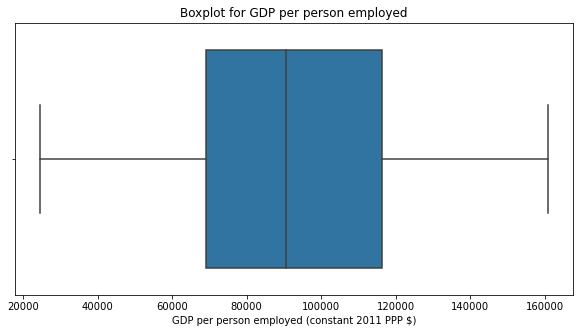

In [48]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'GDP per person employed (constant 2011 PPP $)', data = pop_lessthan_300, orient = 'h')

plt.title('Boxplot for GDP per person employed')

plt.show()

In [49]:
mask1 = country['Long Name'] == 'St. Martin (French part)'
mask2 = country['Long Name'] == 'Sint Maarten (Dutch part)'
country.loc[mask1 | mask2, ['Long Name','Region']]

,Long Name,Region
210,Sint Maarten (Dutch part),Latin America & Caribbean
224,St. Martin (French part),Latin America & Caribbean


Even though the boxplot does not say that two territories, Sint Maarten and St.Martin are not outliers, their GDP per person employed are relatively far off from the rest of the data points. Also their geographical location is actually in the Caribbean, our team decided to drop these two countries in order to find the unique characteristic of the Western Europe

#### dropping two countries mentioned above

In [50]:
pop_lessthan_300.drop(index = ['St. Martin (French part)','Sint Maarten (Dutch part)'], inplace = True)

In [51]:
list(pop_lessthan_300.index)

['Faeroe Islands',
 'Gibraltar',
 'Greenland',
 'Isle of Man',
 'Liechtenstein',
 'Monaco']

### Imputation strategy: filling missing values with median

We made two subgroups in the region depending on the number of population and are going to fill missing values using the median values from each group. We are applying imputation strategy on the groups separately because the the median value of the entire region can skew the data for the countries with less than 300,000 population.

#### Imputation for groups with less than 300,000 population

In [52]:
pop_lessthan_300.isna().sum().sort_values(ascending = False)

AIDS estimated deaths (UNAIDS estimates)                                     6
Antiretroviral therapy coverage (% of people living with HIV)                6
Employment to population ratio, 15+, male (%) (modeled ILO estimate)         6
Employment to population ratio, 15+, female (%) (modeled ILO estimate)       6
GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)    6
Contributing family workers, total (% of total employment)                   6
Contributing family workers, male (% of male employment)                     6
Income share held by lowest 20%                                              6
Contributing family workers, female (% of female employment)                 6
Literacy rate, adult total (% of people ages 15 and above)                   6
Employment to population ratio, 15+, total (%) (modeled ILO estimate)        6
Maternal mortality ratio (modeled estimate, per 100,000 live births)         6
Adolescent fertility rate (births per 1,000 women ag

In [53]:
pop_lessthan_300_copy = pop_lessthan_300.copy()

In [54]:
pop_lessthan_300_copy.describe()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)","Population, total",Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",pop_group
count,0.00,2.00,0.00,0.00,1.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,6.00,0.00,1.00,5.00,5.00,2.00,0.00,5.00,6.00,0.00,0.00,5.00,6.00,6.00,1.00,0.00,0.00,2.00,3.00,2.00,0.00,5.00,2.00,6.00
mean,nan,99.46,nan,nan,81.43,9.87,nan,nan,nan,nan,nan,nan,nan,1.94,110472.76,nan,93.00,99.60,100.00,81.60,nan,66.73,80.66,nan,nan,89.56,5.08,47912.17,84.90,nan,nan,101.93,19.16,96.60,nan,102.27,6.63,0.00
std,nan,0.34,nan,nan,nan,5.44,nan,nan,nan,nan,nan,nan,nan,0.43,30062.92,nan,nan,0.89,0.00,110.87,nan,6.72,6.15,nan,nan,19.79,1.77,17537.15,nan,nan,nan,2.43,9.26,4.39,nan,41.48,9.01,0.00
min,nan,99.22,nan,nan,81.43,1.75,nan,nan,nan,nan,nan,nan,nan,1.43,81721.94,nan,93.00,98.00,100.00,3.20,nan,58.00,70.21,nan,nan,61.36,3.40,32732.00,84.90,nan,nan,100.22,8.48,93.50,nan,38.89,0.26,0.00
25%,nan,99.34,nan,nan,81.43,9.23,nan,nan,nan,nan,nan,nan,nan,1.64,86696.31,nan,93.00,100.00,100.00,42.40,nan,62.82,80.05,nan,nan,79.43,3.97,35619.00,84.90,nan,nan,101.08,16.24,95.05,nan,100.62,3.44,0.00
50%,nan,99.46,nan,nan,81.43,12.36,nan,nan,nan,nan,nan,nan,nan,1.90,105690.32,nan,93.00,100.00,100.00,81.60,nan,67.25,80.89,nan,nan,95.66,4.65,42169.00,84.90,nan,nan,101.93,24.00,96.60,nan,107.37,6.63,0.00
75%,nan,99.58,nan,nan,81.43,13.00,nan,nan,nan,nan,nan,nan,nan,2.16,122895.01,nan,93.00,100.00,100.00,120.80,nan,70.00,82.41,nan,nan,98.20,5.47,54367.25,84.90,nan,nan,102.79,24.50,98.15,nan,109.42,9.81,0.00
max,nan,99.70,nan,nan,81.43,13.01,nan,nan,nan,nan,nan,nan,nan,2.60,160739.12,nan,93.00,100.00,100.00,160.00,nan,75.57,89.30,nan,nan,113.15,8.30,78534.00,84.90,nan,nan,103.65,25.00,99.70,nan,155.05,13.00,0.00


In [55]:
for col in pop_lessthan_300_copy:
    # select columns having one non-missing values at least
    if pop_lessthan_300_copy[col].isna().sum() < 6:
        pop_lessthan_300_copy[col].fillna(pop_lessthan_300_copy[col].median(), inplace = True)

In [56]:
pop_lessthan_300_copy

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)","Population, total",Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",pop_group
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Faeroe Islands,nan,99.46,nan,nan,81.43,13.01,nan,nan,nan,nan,nan,nan,nan,2.60,98190.63,nan,53854,93.00,100.00,100.00,81.60,nan,75.57,80.19,nan,nan,113.15,5.10,48485,84.90,nan,nan,101.93,24.00,96.60,nan,100.62,6.63,0
Gibraltar,nan,99.70,nan,nan,81.43,13.00,nan,nan,nan,nan,nan,nan,nan,1.90,82864.86,nan,73290.00,93.00,100.00,100.00,81.60,nan,58.00,80.00,nan,nan,79.43,5.60,32732,84.90,nan,nan,100.22,24.00,99.70,nan,155.05,6.63,0
Greenland,nan,99.46,nan,nan,81.43,11.72,nan,nan,nan,nan,nan,nan,nan,2.25,81721.94,nan,52718.17,93.00,100.00,100.00,160.00,nan,62.82,70.21,nan,nan,98.20,8.30,56328,84.90,nan,nan,101.93,24.00,96.60,nan,107.37,13.00,0
Isle of Man,nan,99.46,nan,nan,81.43,12.36,nan,nan,nan,nan,nan,nan,nan,1.90,160739.12,nan,73290.00,93.00,100.00,100.00,81.60,nan,67.25,81.60,nan,nan,95.66,3.90,78534,84.90,nan,nan,101.93,8.48,96.60,nan,107.37,6.63,0
Liechtenstein,nan,99.22,nan,nan,81.43,1.75,nan,nan,nan,nan,nan,nan,nan,1.43,126130.01,nan,121650.00,93.00,98.00,100.00,81.60,nan,70.00,82.68,nan,nan,95.66,4.20,35541,84.90,nan,nan,103.65,24.00,93.50,nan,109.42,6.63,0
Monaco,nan,99.46,nan,nan,81.43,12.36,nan,nan,nan,nan,nan,nan,nan,1.55,113190.00,nan,186080.00,93.00,100.00,100.00,3.20,nan,67.25,89.30,nan,nan,61.36,3.40,35853,84.90,nan,nan,101.93,25.00,96.60,nan,38.89,0.26,0


In [57]:
pop_lessthan_300 = pop_lessthan_300_copy

#### Imputation for groups with more than 300+ population

In [58]:
pop_morethan_300.isna().sum().sort_values(ascending = False)

Literacy rate, adult total (% of people ages 15 and above)                   11
Pregnant women receiving prenatal care (%)                                    9
Births attended by skilled health staff (% of total)                          6
AIDS estimated deaths (UNAIDS estimates)                                      5
Antiretroviral therapy coverage (% of people living with HIV)                 4
Primary completion rate, total (% of relevant age group)                      3
Prevalence of HIV, total (% of population ages 15-49)                         3
Tuberculosis death rate (per 100,000 people), including HIV                   1
GDP per person employed (constant 2011 PPP $)                                 0
Fertility rate, total (births per woman)                                      0
Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)          0
Employment to population ratio, 15+, total (%) (modeled ILO estimate)         0
Employment to population ratio, 15+, mal

In [59]:
for col in pop_morethan_300:
    if pop_morethan_300[col].isna().sum() != 14:
        pop_morethan_300[col].fillna(pop_morethan_300[col].median(), inplace = True)

### Merging two groups back to one dataframe

In [60]:
pj = pop_morethan_300.append(pop_lessthan_300)

### Select a country that best represents the region

In [61]:
pj.describe()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)","Population, total",Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",pop_group
count,14.00,20.00,14.00,14.00,20.00,20.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,20.00,20.00,14.00,20.00,20.00,20.00,20.00,14.00,20.00,20.00,14.00,14.00,20.00,20.00,20.00,20.00,14.00,14.00,20.00,20.00,20.00,14.00,20.00,20.00,20.00
mean,335.71,98.46,10.69,57.57,93.36,9.46,1.30,0.63,0.92,50.76,64.96,57.68,110.96,1.77,100721.33,10.81,92.35,98.81,99.83,31.90,7.89,70.27,80.44,97.63,7.50,112.02,4.02,18891626.70,95.30,0.24,2.50,99.21,26.28,96.78,14.68,109.95,2.51,0.70
std,300.81,2.48,5.18,5.08,8.08,4.26,0.87,0.58,0.68,8.50,6.43,7.44,78.53,0.34,35931.86,3.15,3.99,2.22,0.64,42.36,0.87,12.67,3.29,0.59,2.56,21.58,1.27,26965734.51,6.98,0.14,0.00,5.26,8.25,2.65,5.29,65.65,3.49,0.47
min,100.00,88.64,4.30,44.00,81.43,1.75,0.01,0.01,0.04,35.13,56.90,45.64,61.66,1.38,56308.79,2.65,83.00,90.00,97.20,2.20,6.60,44.13,70.21,96.14,4.00,61.36,2.20,32732.00,84.90,0.10,2.50,79.65,8.48,88.62,6.53,38.89,0.26,0.00
25%,125.00,98.36,7.35,57.25,81.43,7.04,0.59,0.25,0.43,44.82,60.84,52.23,82.19,1.45,82579.13,9.83,89.75,98.65,100.00,6.85,7.28,64.71,79.72,97.63,5.25,97.56,3.48,72982.50,84.90,0.20,2.50,99.75,22.80,95.93,11.89,68.32,0.46,0.00
50%,200.00,99.22,9.67,58.00,98.62,9.02,1.08,0.43,0.82,50.67,64.46,57.27,89.71,1.81,89886.83,11.15,93.00,99.50,100.00,10.00,7.85,70.34,80.34,97.63,8.00,112.79,3.75,6570648.00,99.80,0.20,2.50,100.04,24.50,97.08,13.50,103.45,0.71,1.00
75%,500.00,99.52,12.88,58.75,98.65,11.88,2.02,0.75,1.17,56.21,68.55,62.71,101.76,1.93,100778.16,12.17,96.00,100.00,100.00,42.90,8.50,78.59,81.51,97.63,9.75,125.80,4.05,23822721.25,99.80,0.27,2.50,101.93,32.48,98.52,17.07,119.75,3.53,1.00
max,910.00,99.86,23.97,67.00,99.80,22.39,2.67,2.03,2.32,69.07,78.56,73.83,377.38,2.60,223230.64,16.22,98.00,100.00,100.00,160.00,9.80,91.00,89.30,99.16,11.00,151.83,8.30,82110097.00,100.00,0.60,2.50,104.61,41.30,99.78,25.50,343.56,13.00,1.00


In [62]:
pj

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)","Population, total",Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",pop_group
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Austria,100.00,88.64,10.59,62.00,98.60,8.30,2.67,2.03,2.32,50.35,64.54,57.19,90.73,1.42,91063.38,11.02,49110.00,83.00,100.00,100.00,10.00,8.00,72.87,80.43,97.63,4.00,129.71,3.80,8321496,99.80,0.10,2.50,99.81,27.30,88.62,13.58,102.07,0.59,1
Belgium,200.00,97.84,9.23,58.00,98.65,9.75,2.19,0.44,1.22,43.18,56.90,49.86,131.06,1.85,99976.92,7.63,46720.00,93.00,99.50,100.00,10.00,8.70,66.00,79.68,97.63,8.00,105.22,3.80,10709973,99.80,0.20,2.50,99.81,35.30,97.56,14.26,158.91,0.73,1
Switzerland,200.00,98.53,4.30,58.00,98.65,5.28,2.57,1.47,1.97,59.00,73.26,65.94,61.66,1.48,101217.24,16.22,62940.00,92.00,99.90,100.00,7.00,7.50,79.20,81.99,97.63,6.00,116.36,4.00,7647675,99.80,0.20,2.50,94.09,28.50,93.62,15.90,114.78,0.45,1
Germany,600.00,99.74,9.43,61.00,98.50,9.51,1.52,0.42,0.91,48.15,61.76,54.76,98.48,1.38,87914.57,10.15,43870.00,97.00,99.20,100.00,5.90,7.60,78.00,79.74,97.63,7.00,130.07,3.60,82110097,100.00,0.10,2.50,101.90,32.20,97.68,11.69,80.94,0.46,1
Denmark,100.00,96.51,5.58,55.00,94.40,8.54,0.53,0.31,0.42,58.78,68.95,63.79,76.34,1.89,87996.82,13.10,60390.00,87.00,99.60,100.00,6.90,9.80,85.02,78.45,97.63,8.00,119.27,3.60,5493621,99.80,0.20,2.50,100.97,38.00,95.96,8.87,104.83,0.31,1
Spain,200.00,99.86,11.57,58.00,98.65,7.17,1.40,0.77,1.03,43.29,61.47,52.22,88.58,1.45,76441.09,11.29,32450.00,98.00,99.90,100.00,19.00,6.60,59.60,81.18,97.63,5.00,107.88,3.40,45954106,99.80,0.40,2.50,99.86,36.30,99.78,17.61,55.76,0.78,1
France,690.00,99.16,9.91,67.00,98.00,5.69,1.00,0.29,0.62,46.91,57.92,52.26,109.27,2.01,88710.28,9.15,43490.00,89.00,98.70,100.00,10.00,7.90,70.68,81.21,97.63,10.00,93.01,3.60,64374989,99.80,0.40,2.50,99.81,18.20,98.48,10.65,57.40,1.10,1
United Kingdom,200.00,98.90,23.97,58.00,98.65,8.42,0.48,0.24,0.35,52.46,65.29,58.69,88.70,1.91,77669.58,11.27,48420.00,86.00,99.20,100.00,15.00,7.20,78.39,79.60,97.63,11.00,120.72,4.80,61806995,99.80,0.20,2.50,100.60,19.50,98.66,13.42,56.47,0.71,1


In [63]:
print(f'Number of columns without missing values: {pj.isna().sum().value_counts()[0]}')
print(f'Number of columns with missing values: {pj.isna().sum().value_counts()}')

Number of columns without missing values: 22
Number of columns with missing values: 0    22
6    17
dtype: int64


In [64]:
pj

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)","Population, total",Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",pop_group
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Austria,100.00,88.64,10.59,62.00,98.60,8.30,2.67,2.03,2.32,50.35,64.54,57.19,90.73,1.42,91063.38,11.02,49110.00,83.00,100.00,100.00,10.00,8.00,72.87,80.43,97.63,4.00,129.71,3.80,8321496,99.80,0.10,2.50,99.81,27.30,88.62,13.58,102.07,0.59,1
Belgium,200.00,97.84,9.23,58.00,98.65,9.75,2.19,0.44,1.22,43.18,56.90,49.86,131.06,1.85,99976.92,7.63,46720.00,93.00,99.50,100.00,10.00,8.70,66.00,79.68,97.63,8.00,105.22,3.80,10709973,99.80,0.20,2.50,99.81,35.30,97.56,14.26,158.91,0.73,1
Switzerland,200.00,98.53,4.30,58.00,98.65,5.28,2.57,1.47,1.97,59.00,73.26,65.94,61.66,1.48,101217.24,16.22,62940.00,92.00,99.90,100.00,7.00,7.50,79.20,81.99,97.63,6.00,116.36,4.00,7647675,99.80,0.20,2.50,94.09,28.50,93.62,15.90,114.78,0.45,1
Germany,600.00,99.74,9.43,61.00,98.50,9.51,1.52,0.42,0.91,48.15,61.76,54.76,98.48,1.38,87914.57,10.15,43870.00,97.00,99.20,100.00,5.90,7.60,78.00,79.74,97.63,7.00,130.07,3.60,82110097,100.00,0.10,2.50,101.90,32.20,97.68,11.69,80.94,0.46,1
Denmark,100.00,96.51,5.58,55.00,94.40,8.54,0.53,0.31,0.42,58.78,68.95,63.79,76.34,1.89,87996.82,13.10,60390.00,87.00,99.60,100.00,6.90,9.80,85.02,78.45,97.63,8.00,119.27,3.60,5493621,99.80,0.20,2.50,100.97,38.00,95.96,8.87,104.83,0.31,1
Spain,200.00,99.86,11.57,58.00,98.65,7.17,1.40,0.77,1.03,43.29,61.47,52.22,88.58,1.45,76441.09,11.29,32450.00,98.00,99.90,100.00,19.00,6.60,59.60,81.18,97.63,5.00,107.88,3.40,45954106,99.80,0.40,2.50,99.86,36.30,99.78,17.61,55.76,0.78,1
France,690.00,99.16,9.91,67.00,98.00,5.69,1.00,0.29,0.62,46.91,57.92,52.26,109.27,2.01,88710.28,9.15,43490.00,89.00,98.70,100.00,10.00,7.90,70.68,81.21,97.63,10.00,93.01,3.60,64374989,99.80,0.40,2.50,99.81,18.20,98.48,10.65,57.40,1.10,1
United Kingdom,200.00,98.90,23.97,58.00,98.65,8.42,0.48,0.24,0.35,52.46,65.29,58.69,88.70,1.91,77669.58,11.27,48420.00,86.00,99.20,100.00,15.00,7.20,78.39,79.60,97.63,11.00,120.72,4.80,61806995,99.80,0.20,2.50,100.60,19.50,98.66,13.42,56.47,0.71,1


In [65]:
pj['GNI per capita, Atlas method (current US$)'] = pj['GNI per capita, Atlas method (current US$)'].astype('float')

#### Rank of the countries close to the median value of the region

In [66]:
median_region = pj.copy()

# for every columne of the dataframe pj
for col in pj:
    # take a difference between the median value of the column and make it an absolute value. Then rank it from smaller numbers. 
    median_region[col] = abs(pj[col].sub(pj[col].median())).rank(method = 'min')

# overwrite the value above on the new dataframe median_region
median_region['average_rank'] = median_region.mean(1)

print(f'Top 5 countries:\n{median_region.average_rank.sort_values().iloc[0:5]}')

Top 5 countries:
Country Name
Belgium          5.46
Austria          6.10
United Kingdom   6.54
Netherlands      6.97
Germany          7.08
Name: average_rank, dtype: float64


#### Rank of the countries close to the mean value of the region

In [67]:
mean_region = pj.copy()
for col in pj:
    mean_region[col] = abs(pj[col].sub(pj[col].mean())).rank(method = 'min')

mean_region['average_rank'] = mean_region.mean(1)

print(f'Top 5 countries:\n{mean_region.average_rank.sort_values().iloc[0:5]}')

Top 5 countries:
Country Name
Belgium          5.18
Netherlands      6.87
Austria          6.90
United Kingdom   7.05
Ireland          7.13
Name: average_rank, dtype: float64


Belgium is the country that represents the region the best

### Find 5 unique characteristics of the region

Because there are some extreme values that pull the average value of the metadata, we decided to compare median values of our region with those of other regions.

#### Creating another data frame of median values from each region in the world

In [68]:
data1 = data.copy()

In [69]:
data1 = data1.set_index(['Country Name']).drop(columns = ['Country Code Total','Hult Region'])

In [70]:
data1

,Cool Name,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,Ratchet,nan,99.10,32.79,nan,nan,26.23,nan,nan,nan,nan,nan,nan,nan,1.76,nan,nan,nan,nan,97.80,96.80,11.00,nan,52.00,74.72,nan,nan,119.19,nan,nan,101353,nan,nan,nan,nan,95.13,nan,nan,99.06,nan,141.19,0.89
Afghanistan,Mirage,nan,nan,111.14,nan,24.00,0.15,64.24,23.49,28.86,12.92,79.79,47.43,nan,6.25,5276.73,nan,360.00,59.00,28.00,44.40,189.00,nan,1.84,60.24,nan,676.00,28.94,70.60,178.60,27294031,nan,36.00,nan,24.60,nan,27.70,81574.00,nan,72.32,73.07,40.00
Angola,Sideswipe,9200.00,74.89,178.18,6.00,nan,1.18,15.12,11.88,13.48,63.49,69.60,66.45,82.05,6.31,17090.73,12.19,2760.00,57.00,43.30,46.60,382.00,5.40,1.90,56.19,nan,606.00,31.13,86.40,16.96,21759420,12.70,nan,1.60,23.70,39.27,37.30,1377992.00,74.89,71.97,127.54,69.00
Albania,Skids & Mudflap,100.00,87.15,18.91,14.00,nan,1.48,48.59,14.10,28.78,40.38,55.51,47.87,77.65,1.65,24757.50,12.88,3950.00,98.00,89.60,95.80,16.00,8.90,23.86,75.94,95.94,30.00,62.16,12.30,123.79,2947314,2.30,nan,0.10,9.70,92.83,7.10,nan,87.15,59.30,77.45,0.70
Andorra,Skids & Mudflap,nan,nan,nan,nan,nan,6.43,nan,nan,nan,nan,nan,nan,nan,1.25,nan,nan,nan,98.00,100.00,100.00,5.50,nan,70.04,nan,nan,nan,76.56,3.90,nan,83861,nan,nan,nan,nan,nan,25.00,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,Skids & Mudflap,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,168.47,2.38,nan,5.94,3100.00,nan,nan,nan,nan,nan,nan,69.40,nan,nan,32.30,nan,nan,1747383,nan,nan,nan,nan,nan,nan,nan,nan,nan,69.91,nan
"Yemen, Rep.",Wheeljack,nan,75.99,74.81,nan,nan,1.00,28.73,9.11,11.13,7.09,61.53,34.40,77.00,4.94,21828.93,12.99,990.00,69.00,52.00,54.30,60.00,nan,6.89,62.89,nan,417.00,28.83,47.20,19.19,22356391,nan,nan,nan,27.10,62.40,0.

In [71]:
def create_region(data, region):
    
    return data.loc[data1['Cool Name'] == region].drop(columns = 'Cool Name').median()

In [72]:
Ratchet = create_region(data1, 'Ratchet')
Mirage = create_region(data1, 'Mirage')
Sideswipe = create_region(data1, 'Sideswipe')
Skids_and_Mudflap = create_region(data1, 'Skids & Mudflap')
Wheeljack = create_region(data1, 'Wheeljack')
Ironhide = create_region(data1, 'Ironhide')
Cliffhanger = create_region(data1, 'Cliffhanger')
Jazz = create_region(data1, 'Jazz')
Dinobots = create_region(data1, 'Dinobots')
Hot_Rod = create_region(data1, 'Hot Rod')
Optimus_Prime = create_region(data1, 'Optimus Prime')
Bumblebee = create_region(data1, 'Bumblebee')
Sentinel_Prime = create_region(data1, 'Sentinel Prime')

In [73]:
median_data = [Ratchet,Mirage,Sideswipe,Skids_and_Mudflap,Wheeljack,Ironhide,Cliffhanger,Jazz,Dinobots,Hot_Rod,Optimus_Prime,Bumblebee,pj.median()]
median_index = ['Ratchet','Mirage','Sideswipe','Skids_and_Mudflap','Wheeljack','Ironhide','Cliffhanger','Jazz','Dinobots','Hot_Rod','Optimus_Prime','Bumblebee','Jetfire']
median_values = pd.DataFrame(median_data, index = median_index)

In [74]:
median_values.drop(columns = 'pop_group', inplace = True)

In [75]:
median_values

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
Ratchet,1250.00,97.17,47.91,27.00,99.95,4.29,1.39,0.49,0.89,48.88,67.16,59.39,194.37,2.00,28833.00,5.47,7380.00,98.00,91.40,96.00,11.00,4.60,31.54,74.37,nan,58.00,103.44,16.30,80.59,109165.00,nan,99.75,1.50,11.15,95.13,13.30,931.00,94.51,26.06,94.54,1.06
Mirage,200.00,90.99,30.25,5.50,99.60,4.62,16.31,5.58,8.85,45.67,62.84,51.69,171.53,1.74,20566.04,5.83,3410.00,96.00,85.90,95.30,106.50,7.10,11.51,69.78,69.24,33.50,61.25,17.50,13.35,15032930.00,5.10,46.00,0.15,5.50,95.01,14.00,4210.50,88.40,31.59,83.36,9.75
Sideswipe,4400.00,71.93,119.08,8.00,54.70,0.37,15.41,8.54,10.65,51.35,66.54,59.69,139.19,5.25,6442.35,7.35,1000.00,74.50,30.90,73.05,193.00,5.10,2.68,57.18,60.31,606.00,33.18,73.90,60.72,5255379.00,18.20,86.90,2.20,14.75,66.73,10.80,39164.00,69.59,75.06,69.51,34.50
Skids_and_Mudflap,100.00,97.53,17.59,33.00,99.65,6.34,1.93,1.05,1.47,43.08,61.57,50.71,126.02,1.51,54446.75,7.94,13695.00,97.00,97.30,99.50,16.00,8.70,55.22,75.58,95.94,9.00,107.12,5.50,123.67,3480915.00,1.60,99.90,0.10,2.50,96.62,19.30,nan,95.48,14.13,92.68,1.70
Wheeljack,100.00,97.50,14.63,33.00,98.05,7.93,1.13,0.74,0.81,21.63,69.02,47.73,112.12,2.89,65186.47,8.92,17900.00,95.50,97.50,97.00,18.00,8.40,34.37,73.76,93.22,18.00,93.45,10.20,70.09,6489822.00,2.60,97.00,0.10,4.70,98.65,9.10,61.00,92.20,15.96,94.17,0.86
Ironhide,1500.00,96.29,63.78,20.00,95.40,2.22,5.60,3.22,4.05,47.76,74.35,60.29,93.32,2.53,27179.08,10.72,5505.00,95.00,79.95,92.50,37.00,3.80,25.74,73.26,93.38,85.00,90.46,17.35,16.11,14447562.00,13.25,91.05,0.40,9.30,100.21,17.75,10781.50,94.14,34.15,66.63,3.10
Cliffhanger,500.00,99.33,30.99,52.00,97.00,1.15,4.65,8.96,9.21,50.18,71.42,61.29,136.19,3.59,29815.57,7.37,3240.00,86.00,80.20,96.80,57.00,6.60,13.00,71.91,nan,110.00,53.34,23.45,427.37,159035.00,9.90,99.50,0.10,4.30,106.43,4.05,40535.00,96.81,41.31,103.95,4.60
Jazz,8300.00,85.74,93.64,16.00,74.80,0.17,16.3

#### Creating another region that shows the rank of the value

In [76]:
median_values_rank = median_values.copy().rank(method = 'min')

#### Select columns that contains the first or last rank of Jetfire region

In [77]:
# True if jetfire region is at 1st or 13th place, otherwise False
mask1 = median_values_rank.loc['Jetfire',:] == 1
mask2 = median_values_rank.loc['Jetfire',:] == 13

In [78]:
# Select only columns that are True to the above columns
first_list = list(mask1.loc[mask1 == True].index)
last_list = list(mask2.loc[mask2 == True].index)

In [79]:
# combining two lists into one
col_list = first_list
for col in last_list:
    col_list.append(col)

In [80]:
col_list.sort()

In [81]:
median_values = median_values.loc[:, col_list]
median_values

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Internet users (per 100 people),"Life expectancy at birth, total (years)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Prevalence of undernourishment (% of population),Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)","Self-employed, total (% of total employment)","Tuberculosis death rate (per 100,000 people), including HIV"
Ratchet,47.91,27.00,4.29,1.39,0.49,194.37,28833.00,5.47,7380.00,91.40,96.00,11.00,31.54,74.37,58.00,103.44,16.30,11.15,13.30,94.51,26.06,1.06
Mirage,30.25,5.50,4.62,16.31,5.58,171.53,20566.04,5.83,3410.00,85.90,95.30,106.50,11.51,69.78,33.50,61.25,17.50,5.50,14.00,88.40,31.59,9.75
Sideswipe,119.08,8.00,0.37,15.41,8.54,139.19,6442.35,7.35,1000.00,30.90,73.05,193.00,2.68,57.18,606.00,33.18,73.90,14.75,10.80,69.59,75.06,34.50
Skids_and_Mudflap,17.59,33.00,6.34,1.93,1.05,126.02,54446.75,7.94,13695.00,97.30,99.50,16.00,55.22,75.58,9.00,107.12,5.50,2.50,19.30,95.48,14.13,1.70
Wheeljack,14.63,33.00,7.93,1.13,0.74,112.12,65186.47,8.92,17900.00,97.50,97.00,18.00,34.37,73.76,18.00,93.45,10.20,4.70,9.10,92.20,15.96,0.86
Ironhide,63.78,20.00,2.22,5.60,3.22,93.32,27179.08,10.72,5505.00,79.95,92.50,37.00,25.74,73.26,85.00,90.46,17.35,9.30,17.75,94.14,34.15,3.10
Cliffhanger,30.99,52.00,1.15,4.65,8.96,136.19,29815.57,7.37,3240.00,80.20,96.80,57.00,13.00,71.91,110.00,53.34,23.45,4.30,4.05,96.81,41.31,4.60
Jazz,93.64,16.00,0.17,16.38,7.01,217.28,4330.94,4.62,450.00,28.70,69.30,474.00,3.50,55.64,535.00,25.15,58.50,32.10,15.20,85.74,73.59,36.00
Dinobots,33.13,4.00,1.31,31.17,8.46,168.53,11970.12,5.93,1730.00,73.80,88.40,165.00,8.78,68.45,89.00,50.26,29.60,14.90,11.85,91.02,56.77,19.00
Hot_Rod,77.79,25.00,1.84,6.44,4.35,115.77,24893.09,8.64,6420.00,77.80,92.70,29.00,26.30,75.80,54.50,78.89,17.60,11.60,18.50,94.66,32.12,2.40


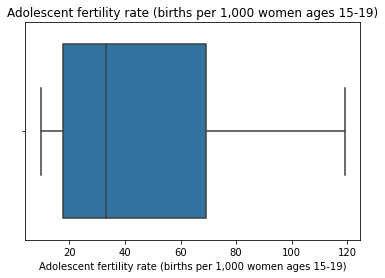

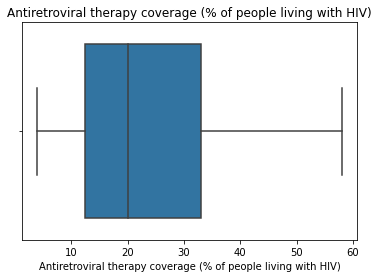

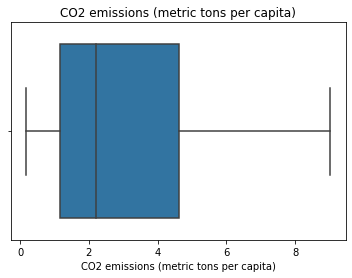

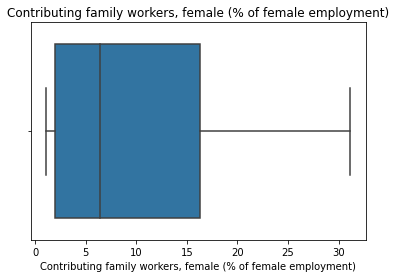

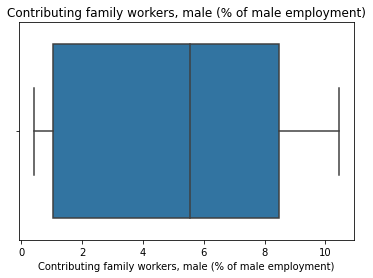

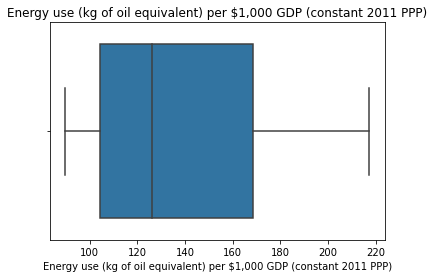

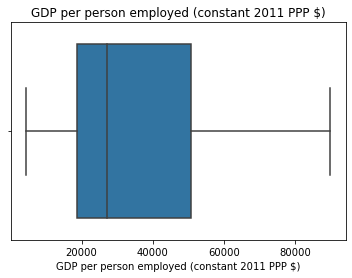

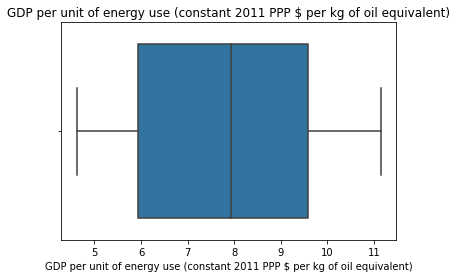

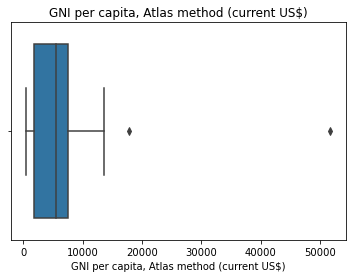

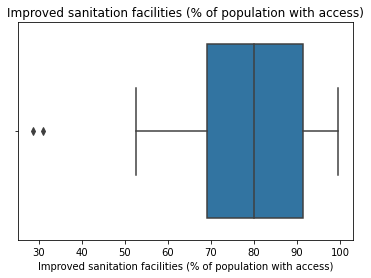

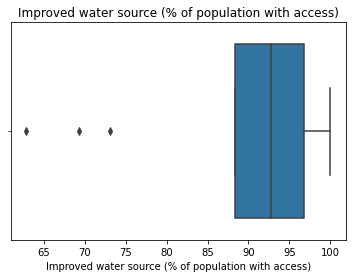

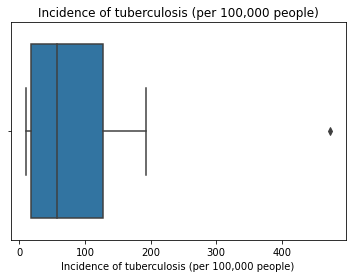

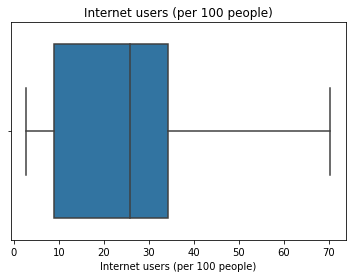

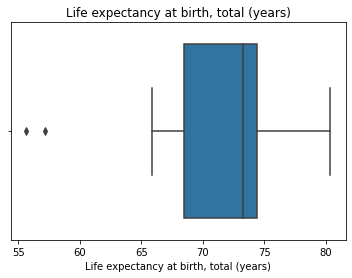

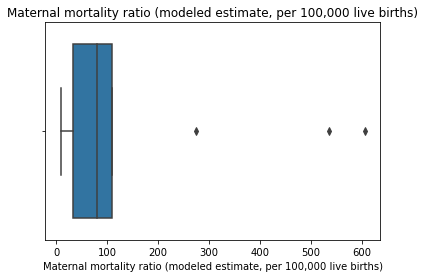

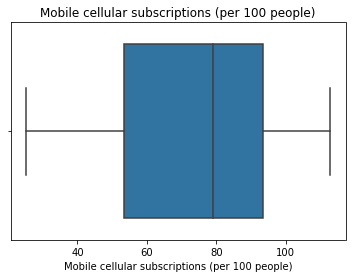

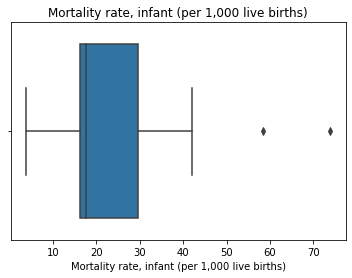

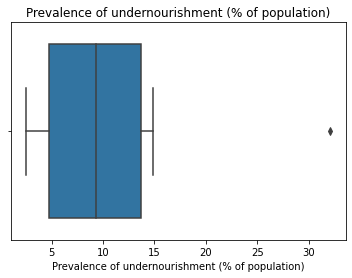

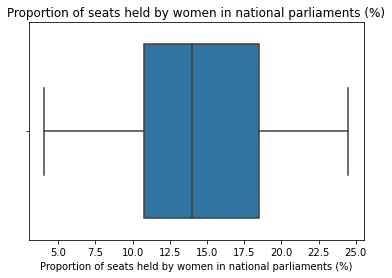

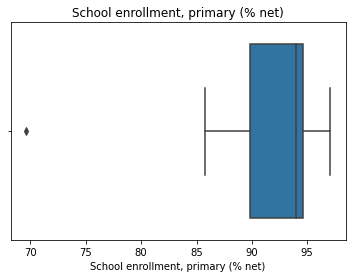

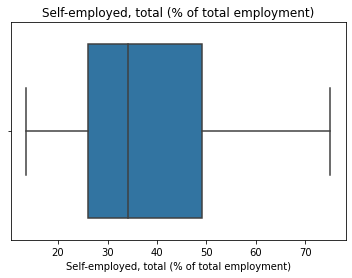

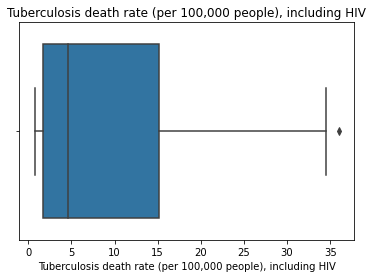

In [82]:
for col in median_values.columns:
    sns.boxplot(x = median_values[col])
    plt.title(col)
    plt.show()

In [84]:
median_values.corr()

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Internet users (per 100 people),"Life expectancy at birth, total (years)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Prevalence of undernourishment (% of population),Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)","Self-employed, total (% of total employment)","Tuberculosis death rate (per 100,000 people), including HIV"
"Adolescent fertility rate (births per 1,000 women ages 15-19)",1.00,-0.45,-0.72,0.30,0.48,0.27,-0.75,-0.24,-0.53,-0.82,-0.73,0.53,-0.67,-0.76,0.84,-0.66,0.84,0.62,-0.20,-0.73,0.75,0.65
Antiretroviral therapy coverage (% of people living with HIV),-0.45,1.00,0.55,-0.73,-0.47,-0.33,0.71,0.35,0.71,0.55,0.55,-0.46,0.61,0.58,-0.40,0.52,-0.53,-0.50,0.11,0.57,-0.59,-0.59
CO2 emissions (metric tons per capita),-0.72,0.55,1.00,-0.60,-0.83,-0.32,0.89,0.33,0.82,0.79,0.67,-0.57,0.81,0.69,-0.64,0.80,-0.75,-0.63,0.41,0.45,-0.86,-0.64
"Contributing family workers, female (% of female employment)",0.30,-0.73,-0.60,1.00,0.80,0.18,-0.61,-0.19,-0.51,-0.59,-0.71,0.49,-0.62,-0.57,0.41,-0.67,0.56,0.40,-0.25,-0.40,0.67,0.58
"Contributing family workers, male (% of male employment)",0.48,-0.47,-0.83,0.80,1.00,0.14,-0.71,-0.20,-0.64,-0.72,-0.71,0.50,-0.78,-0.67,0.58,-0.87,0.71,0.37,-0.54,-0.46,0.80,0.62
"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",0.27,-0.33,-0.32,0.18,0.14,1.00,-0.57,-0.97,-0.44,-0.32,-0.17,0.62,-0.50,-0.53,0.35,-0.48,0.36,0.62,-0.28,-0.28,0.43,0.49
GDP per person employed (constant 2011 PPP $),-0.75,0.71,0.89,-0.61,-0.71,-0.57,1.00,0.59,0.88,0.72,0.63,-0.58,0.92,0.77,-0.62,0.81,-0.73,-0.62,0.48,0.56,-0.80,-0.63
GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),-0.24,0.35,0.33,-0.19,-0.20,-0.97,0.59,1.00,0.51,0.28,0.10,-0.55,0.53,0.51,-0.31,0.50,-0.35,-0.52,0.38,0.31,-0.42,-0.47
"GNI per capita, Atlas method (current US$)",-0.53,0.71,0.82,-0.51,-0.64,-0.44,0.88,0.51,1.00,0.55,0.48,-0.41,0.82,0.60,-0.42,0.66,-0.55,-0.46,0.57,0.39,-0.63,-0.45
Improved sanitation facilities (% of population with access),-0.82,0.55,0.79,-0.59,-0.72,-0.32,0.72,0.28,0.55,1.00,0.90,-0.82,0.69,0.92,-0.95,0.85,-0.97,-0.78,0.24,0.76,-0.95,-0.91


In [83]:
#CO2 emissions per capita, gdp per person employed, gni per capita, internet users, (life expectancy at brith or proportion of seats held by women in national parliaments)